(1, 10304)
(112, 92)
0.8980392 0.07450981


Text(0.5, 1.0, 'user number: 15')

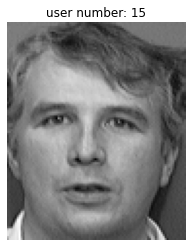

In [12]:
import matplotlib.image as mimg
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 

# for single image 
user = 15
sample = 5
path = './orl_faces/u(%d)/%d.png'%(user,sample)

im = mimg.imread(path)
# need to convert this 2-D data into 1-D so, that it can be processed in ML classification algo.
feat = im.reshape(1,-1)
print(feat.shape)

print(im.shape)
print(im.max(),im.min()) # 0-255 

# disply the image 
plt.figure(1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('user number: '+str(user))

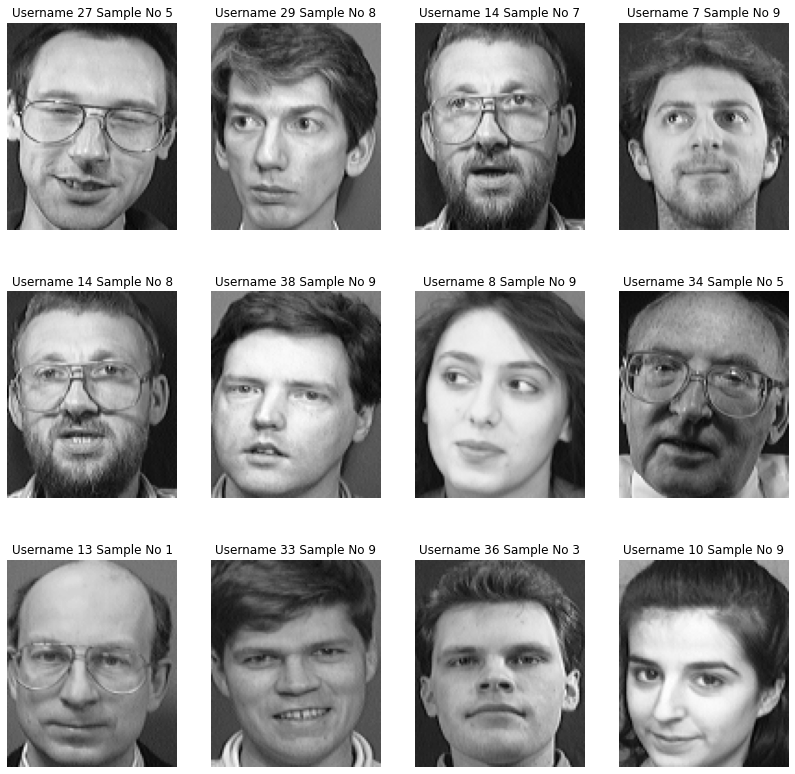

In [9]:
# display of the database 
for i in range(12):
    username = np.random.randint(1,41)
    sample = np.random.randint(1,11)
    path = "./orl_faces/u(%d)/%d.png"%(username,sample)
    
    im = mimg.imread(path)
    plt.figure(1,figsize=(14,14))
    plt.subplot(3,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    plt.title('Username '+str(username) +' Sample No '+str(sample))

In [11]:
# all samples 

X = np.zeros((400,112*92))
y = np.zeros((400))
count=0
for i in range(1,41,1): # users 
    for j in range(1,11): # samples
        user = i
        sample = j
        path = './orl_faces/u(%d)/%d.png'%(user,sample)

        im = mimg.imread(path)
        feat = im.reshape(1,112*92) # converting the 2D into 1-D 
        X[count, :] = feat
        y[count] = i # it keeps the track of the user number 
        count = count+1 # this counter will change the index of the database 
        print('user number: ',user,', sample number: ',sample)



        

user number:  1 , sample number:  1
user number:  1 , sample number:  2
user number:  1 , sample number:  3
user number:  1 , sample number:  4
user number:  1 , sample number:  5
user number:  1 , sample number:  6
user number:  1 , sample number:  7
user number:  1 , sample number:  8
user number:  1 , sample number:  9
user number:  1 , sample number:  10
user number:  2 , sample number:  1
user number:  2 , sample number:  2
user number:  2 , sample number:  3
user number:  2 , sample number:  4
user number:  2 , sample number:  5
user number:  2 , sample number:  6
user number:  2 , sample number:  7
user number:  2 , sample number:  8
user number:  2 , sample number:  9
user number:  2 , sample number:  10
user number:  3 , sample number:  1
user number:  3 , sample number:  2
user number:  3 , sample number:  3
user number:  3 , sample number:  4
user number:  3 , sample number:  5
user number:  3 , sample number:  6
user number:  3 , sample number:  7
user number:  3 , sample n

user number:  23 , sample number:  5
user number:  23 , sample number:  6
user number:  23 , sample number:  7
user number:  23 , sample number:  8
user number:  23 , sample number:  9
user number:  23 , sample number:  10
user number:  24 , sample number:  1
user number:  24 , sample number:  2
user number:  24 , sample number:  3
user number:  24 , sample number:  4
user number:  24 , sample number:  5
user number:  24 , sample number:  6
user number:  24 , sample number:  7
user number:  24 , sample number:  8
user number:  24 , sample number:  9
user number:  24 , sample number:  10
user number:  25 , sample number:  1
user number:  25 , sample number:  2
user number:  25 , sample number:  3
user number:  25 , sample number:  4
user number:  25 , sample number:  5
user number:  25 , sample number:  6
user number:  25 , sample number:  7
user number:  25 , sample number:  8
user number:  25 , sample number:  9
user number:  25 , sample number:  10
user number:  26 , sample number:  

In [13]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split


# SVM with best kernel function 
# DT with Training and testing accuracy 
# RF with training and testing accuracy 


In [15]:
import pandas as pd
test_ratio=[0.5,0.3,0.2]
kernel=['rbf','poly','linear']
result=np.zeros([len(test_ratio),len(kernel)])
for i in range(len(test_ratio)):
    Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=test_ratio[i],random_state=2)
    for j in range(len(kernel)):
        svmModel = svm.SVC(kernel =kernel[j] ,degree=3, max_iter=3000,decision_function_shape='ovr',C=1,gamma='scale')
        svmModel = svmModel.fit(Xtrain,ytrain)
        yp = svmModel.predict(Xtest)
        acc=metrics.accuracy_score(yp,ytest)
        result[i,j] =acc

In [16]:
resultFrame = pd.DataFrame(result,columns=kernel,index=test_ratio)
print(resultFrame)

          rbf      poly    linear
0.5  0.700000  0.930000  0.925000
0.3  0.891667  0.966667  0.966667
0.2  0.937500  0.975000  0.975000


In [ ]:
# bar chart for DT vs RF vs SVM 
